In [1]:
import numpy as np

from sklearn import cluster

def quantize(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(reshaped_raster)
    palette = model.cluster_centers_

    quantized_raster = np.reshape(
        palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

In [3]:
import scipy.misc

raster = scipy.misc.imread("./image4.jpg")

C:\Users\Xiaohe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
quantized_rgb = quantize(raster,8)

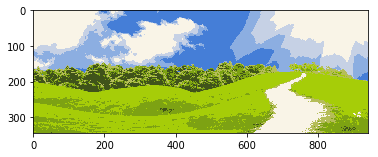

In [44]:
import matplotlib.pyplot as plt
plt.imshow(quantized_rgb/255)

In [45]:
plt.show()

In [46]:
plt.imsave('image4Quantized8.png', quantized_rgb/255)

In [47]:
# from skimage import color

# lab_raster = color.rgb2lab(rgb_raster)
# rgb_raster = color.lab2rgb(lab_raster) * 255).astype('uint8')